# Decision Tree Learning

Decision tree learning is one of the most widely used and practical methods for inductive inference. It is a method for approximating discrete-valued functions that is robust to noisy data and capable of learning disjunctive expressions. This chapter describes a family of decision tree learning algorithms that includes widely used algorithms such as ID3, ASSISTANT, and C4.5. These decision tree learning methods search a completely expressive hypothesis space and thus avoid the difficulties of restricted hypothesis spaces. Their inductive bias is a preference for small trees over large trees.

In general, decision trees represent a disjunction of conjunctions of constraints on the attribute values of instances. Each path from the tree root to a leaf corresponds to a conjunction of attribute tests, and the tree itself to a disjunction of these conjunctions. 


## 1.1 Appropriate problems for decision tree learning

Decision tree is very helpful in scenarios where:
- Where instances are represented as attribute value pairs. There are discrete values of attributes. For example, Temperature can be *Hot, Mild, Cold*
- Target function has discrete output values. It can be binary (*yes* or *no*) or can have more than two classes.
- Disjunctive descriptions may be required to express the hypothesis.
- Training data may contain errors
- Training data might have some missing attributes

## 1.2 Basic Decision Tree Algorithm

Most of the approaches are based on top-down greedy approaches of searching the right decision tree from the space of decision trees. It starts of by asking which attribute is statistically the best to split the data at root node.

### 1.2.1 ID3 algorithm

---
***Alogirthm 1.2.1***:
ID3(Examples, Target_attribute, Attributes):
1. Create a root node.
2. **If** all example in *Examples* are positive then ***return Root with label +***
3. **If** all example in *Examples* are negative then ***return Root with label -***
4. **If** *Attributes* is empty then ***return Root with label = most common Target_attribute in Examples***
5. **Else**:
   - $A \leftarrow$ Best attribute from *Attributes* which best\* classifies *Examples*
   - Set $A$ as decision attribute for $Root$
   - For each possible value $v_i$ of $A$:
       - Add a new tree branch below *Root*, corresponding to the test $A = v_i$
       - **Let** $Examples_{v_i}$ be the subset of *Examples* that have value $v_i$ for $A$
       - **If** $Examples_{v_i}$ is empty:
           - **Then** Below this new branch add a new leaf node with label = most common value of *Target_attribute in Examples*
           - **Else** Below this new branch add a subtree ID3($Examples_{v_i}$, $Target\_attribute$, $Attribute - \{A\}$)
---
**\*Best**: Best attribute is the one with the highest information gain.

### 1.2.2 How to decide the best attribute ?

There are multiple way to decide the best attribute one of them is ***Information Gain***.

### 1.2.3 Information Content

This definition is taken from information theory. We define something called as *information content*. Given a random variable $X$ with a probability mass function $p_X(x)$, the self-information of measuring $X$ as outcome $x$ is defined as
 $$I_X(x) = - log_2(p_X(x))$$

 The unit of information is called *Shannon* (or simply bit).<br>
**Below is the implementation of Information Content**:

In [19]:
#Plot Ix(x)
import matplotlib.pyplot as plot
import math
def InformationContent(x):
    assert 0 <= x <= 1
    if x == 0:
        return 0
    return -math.log(x, 2)
x = [i*0.001 for i in range(1, 1000)]
y = [InformationContent(i) for i in x]
plot.close()
plot.title("Information Content")
plot.xlabel(r'$p_X(x)$')
plot.ylabel(r'$I_X(x) = -log_2(p_X(x))$')
plot.plot(x, y)
plot.show()

<Figure size 640x480 with 1 Axes>

### 1.2.4 Information Gain
Clearly *information content* is more in outcomes which are less frequent.
Using this we define *entropy* as average $I_X(x)$ (information content) for a sample space $S$.
$$Entropy(S) = -\sum_{i \in S} p_i log_2 p_i$$
In other words, $Entropy(S) = E[I_x(x)]$ (expected or average information content)
Entropy can be seen as the measure of average number of bits needed to communicate a message from space $S$. 
For more information on the rationale behind defining $Entropy$ like this read the following <a href="https://en.wikipedia.org/wiki/Entropy_(information_theory)#Rationale">Wiki Page</a>

We define the Information Gain for a sample $S$ and attribute $A$ as:
$$Gain(S, A) = Entropy(S) - \sum_{v \in A} \frac{|S_v|}{|S|}Entropy(S_v)$$

The *entropy* is minimum when each outcome is equally likely. (This can be seen in the entropy diagram)<br>
**Below is the implementation of Information Gain**:

In [18]:
import typing
def EpsEquals(f1:float, f2: float, eps: float=10**-6):
    return abs(f1 - f2) <= eps

def Entropy(p:typing.List[float]):
    assert EpsEquals(sum(p), 1.0)
    return sum([pi * InformationContent(pi) for pi in p])

x = [[i * 0.001, 1 - i * 0.001] for i in range(1000)]
y = [Entropy(xi) for xi in x]
plot.close()
plot.title("Entropy")
plot.xlabel("p")
plot.ylabel(r'$plog_2(p) +(1-p)log_2(1-p)$')
plot.plot(x, y)
plot.show()
Entropy([1/2, 1/3, 1/18, 1 - 1/3 - 1/2 - 1/18 - 1/19 - 1/20, 1/19, 1/20])

NameError: name 'InformationContent' is not defined

**Below is the implementation of ID3 decision tree algorithm**:

In [17]:
#IMPORTANT NOTE
#This piece of code is not intended for production scale and 
#should ideally be used for pedagogical purposes.
#Use it at your own risk

#ID3 implementation
import numpy as np
import pandas as pd
import typing
from graphviz import Digraph
import os
GRAPHVIZ_PATH = r'C:\Program Files (x86)\Graphviz2.38\bin'
os.environ["PATH"] += os.pathsep + GRAPHVIZ_PATH

class Node:
    def __init__(self, node_name:str="_null_", label:str="_null_", test:str="_null_", is_leaf:bool=False):
        self._children = []
        self.name = node_name
        self.label = label
        self.test = test
        self.leaf = is_leaf
        pd.options.mode.chained_assignment = None
    
    def add_child(self, node):
        self._children.append(node)
    
    def get_children(self):
        return self._children
    
    def set_name(self, name: str):
        self.name = name
        
    def set_label(self, label: str):
        self.label =str(label)
        
    def set_test(self, test: typing.List[str]):
        self.test = test
    
    def set_leaf(self):
        self.leaf = True
    
    def visualize(self):
        digraph = Digraph(comment="Tree")
        Node._get_graph(self, digraph, [0])
        return digraph
    
    @staticmethod
    def _get_graph(node, digraph: Digraph, unique_suff:typing.List[int]):
        unique_suff[0] += 1
        curr_node_name = str(unique_suff[0])
        digraph.node(curr_node_name, node.label)
        if not node.leaf:
            node._children.sort(key=lambda x: x.test[2])
            for child in node._children:
                child_name = str(unique_suff[0] + 1)
                Node._get_graph(child, digraph, unique_suff)
                digraph.edge(curr_node_name, child_name, label="%s %s '%s'" % tuple(child.test))

class ID3:
    def __init__(self, train_data: pd.DataFrame, labels: typing.List[str], populate_inner_properties: bool=True):
        self.attributes = list(train_data.columns)
        self.distinct_labels = set(labels)
        self.train_data: pd.DataFrame = train_data.copy(deep=True)
        self.train_data["_index_"] = range(0, len(train_data))
        self.label_dictionary = {i:labels[i] for i in range(len(labels))}
        self.labels = labels
        self.attribute_values = None
        self._model = None
        if populate_inner_properties:
            self.populate()
    
    def populate(self):
        self.attribute_values = {attr: set(self.train_data[attr].unique()) for attr in self.attributes}
    
    @staticmethod
    def _entropy(freq: typing.List[int]):
        cum_sum = sum(freq)
        p = [freq[i]/cum_sum for i in range(len(freq))]
        entropy = Entropy(p)
        return entropy
    
    def get_best_attribute(self, df: pd.DataFrame, attributes: typing.List[str], labels: typing.List[str]):
        cur_label_cnt_dict = ID3._get_label_count_dict(labels)
        cur_freq = [cur_label_cnt_dict[key] for key in cur_label_cnt_dict]
        cur_total = sum(cur_freq)
        cur_entropy = ID3._entropy(cur_freq)
        max_gain = -math.inf
        split_attr = None
        for attr in attributes:
            distinct_values = self.get_distinct_values(attr, df, labels)
            partial = 0
            gain = 0
            for val in distinct_values:
                new_df = self.eval_attr_condition(attr, df, val)
                if len(new_df) == 0:
                    continue
                new_labels = [labels[int(str(idx))] for idx in new_df["_index_"]]
                new_label_cnt_dict = ID3._get_label_count_dict(new_labels)
                new_freq = [new_label_cnt_dict[key] for key in new_label_cnt_dict]
                new_entropy = ID3._entropy(new_freq)
                new_total = sum(new_freq)
                new_partial = new_total / cur_total * new_entropy
                partial += new_partial
            gain = cur_entropy - partial
            if gain > max_gain:
                split_attr = attr
                max_gain = gain
        return [split_attr, max_gain]
    
    def get_distinct_values(self, attr: str, df: pd.DataFrame, labels: typing.List[str]):
        return self.attribute_values[attr]
    
    def eval_attr_condition(self, attr, df, val):
        return df[df[attr] == val]
    
    def get_test_condition(self, attr, value):
        return "=="
    
    def get_test_value(self, attr, value):
        return value
    
    def get_distinct_labels(self, labels):
        return set(labels)        
    
    @staticmethod
    def _get_label_count_dict(labels: typing.List[str]):
        distinct_labels = set(labels)
        label_cnt_dict =  {l : labels.count(l) for l in distinct_labels}
        return label_cnt_dict
    
    @staticmethod
    def _get_label_with_high_freq(labels: typing.List[str]):
        label_cnt_dict = ID3._get_label_count_dict(labels)
        maxi = -math.inf
        max_label = labels[0]
        for label in label_cnt_dict:
            if label_cnt_dict[label] > maxi:
                maxi = label_cnt_dict[label]
                max_label = label
        return max_label
    
    @staticmethod
    def _printExamples(name: str, df: pd.DataFrame):
        print("------------------------")
        print(name)
        print(df)
        print("------------------------")
    
    def id3(self, example: pd.DataFrame, labels: typing.List[str], attribute_set: set):
        example["_labels_"] = labels
        root_node = Node()
        distinct_labels = self.get_distinct_labels(labels)
        if len(distinct_labels) == 1: # If all labels are of same type
            root_node.set_label(labels[0])
            root_node.set_name("LeafNode")
            root_node.set_leaf()
        elif len(attribute_set) == 0: # If there are no attributes left
            root_node.set_label(ID3._get_label_with_high_freq(labels))
            root_node.set_name("LeafNode")
            root_node.set_leaf()
        else: # We need to choose the best attribute and then recursively build the tree
            best_attr, entropy_value = self.get_best_attribute(example, list(attribute_set), labels)
            # ID3._printExamples("Best attribute %s %s" % (best_attr, entropy_value), example)
            root_node.set_label("{{\"Attr\":\"{}\", \"Gain\":\"{}\"}}".format(best_attr, entropy_value))
            for value in self.get_distinct_values(best_attr, example, labels):
                new_examples = self.eval_attr_condition(best_attr, example, value)
                new_labels = [labels[int(str(idx))] for idx in new_examples["_index_"]]
                new_examples["_index_"] = range(0, len(new_examples))
                new_child_node:Node = None
                new_attribute_set = set(attribute_set)
                new_attribute_set.remove(best_attr)
                if len(new_examples) == 0:
                    new_child_node = Node()
                    new_child_node.set_label(ID3._get_label_with_high_freq(labels))
                    new_child_node.set_leaf()
                else:
                    new_child_node = self.id3(new_examples, new_labels, new_attribute_set)
                new_child_node.test = [best_attr, self.get_test_condition(best_attr, value), self.get_test_value(best_attr, value)]
                root_node.add_child(new_child_node)
        return root_node
    
    def train(self):
        self._model = self.id3(self.train_data, self.labels, set(self.attributes))
    
    def evaluate_test(self, row_value, condition, val):
        return row_value == val
    
    def test_row(self, cur_node, df_row):
        if cur_node.leaf:
            print("Output: [", "TestData =",df_row.to_dict(), "NodeLabel =", cur_node.label, "]")
            print()
            return cur_node.label
        else:
            for child in cur_node._children:
                attr, condition, value = child.test
                if self.evaluate_test(df_row[attr], condition, value):
                    # print("Checking Node:[", attr, condition, value, "TestData =", df_row.to_dict(), "NodeLabel =", child.label, "]")
                    return self.test_row(child, df_row)
    
    def test(self, df: pd.DataFrame):
        return [self.test_row(self._model, row) for index, row in df.iterrows()]
df = pd.DataFrame({"Sky":["Blue", "Blue", "Dark", "Dark", "Gloomy"],
                   "Grass":["Green", "Yellow", "Green", "Yellow", "Green"]})
labels =               ["Play", "Don't Play", "Don't Play", "Don't Play", "Don't Play"]
df_test = pd.DataFrame({"Sky":["Blue", "Gloomy", "Dark"],
                        "Grass":["Yellow", "Yellow", "Yellow"]})
id3 = ID3(df, labels)
id3.train()
id3.test(df_test)
id3._model.visualize()

NameError: name 'Entropy' is not defined

# 1.3 Hypothesis Space For Decision Tree

The set of all possible decision trees is the hypothesis space for Decision Tree. It is hypothesis space of decision tree is *complete space* of finite discrete valued functions, relative to the attributes.
Some important features about ID3 algorithm:
- ID3 maintains only a single current hypothesis as it searches through the space of decision trees. 
- This contrasts, for example, with the version space *Candidate-Elimination* method, which maintains the set of all hypotheses consistent with the available training examples. 
- ID3 doesn't have the capability to determine how many alternative decision tree are consistent with the training data.
- ID3 doesn't perform any backtracking. It uses kind of greedy hill climbing approach. (This gap can be filled by using post-pruning)
- ID3 can be modified to handle noisy data. ID3 uses all training examples at each step in the search to make statistically based decisions regarding how to refine its current hypothesis. This contrasts with methods that make decisions incrementally, based on individual training examples (e.g., Find-S or Candidate-Elimination). One advantage of using statistical properties of all the examples (e.g., information gain) is that the resulting search is much less sensitive to errors in individual training examples. ID3 can be easily extended to handle noisy training data by modifying its termination criterion to accept hypotheses that imperfectly fit the training data

# 1.4 Inductive Bias For Decision Tree

Since ID3 follows heuristics to get to the first tree in a simple to complex tree search (like hill climbing). Therefore decision tree prefers shorter trees over larger ones. But this is not very evident because of the heuristics.

**Approximate Inductive Bias** : Shorter trees are preferred.
A better bias will be to include the heuristic in the bias.

**A more closer Inductive Bias**: Shorter trees are preferred over longer trees. Trees that place high information gain attributes close to the root are preferred over those that do not.

Decision tree has a *restriction bias* whereas candidate elimination has *preference bias*. *Restriction bias* is when the hypothesis space is searched incompletely and not all consistent hypothesis are considered, the algorithm stops at the first consistent hypothesis. Whereas in *preference bias* the search space itself is restricted.

Decision tree prefers a shorter hypothesis based on ***Ocam Razor's Principle***, prefer the simplest hypothesis which fits the data. The Ocam Razor too has problems. The difficulty here is that there are very many small sets of hypotheses that one can define and most of them rather arcane.

Why should we believe that the small set of hypotheses consisting of decision trees with short descriptions should be any more relevant than the multitude of other small sets of hypotheses that we might define? 


## 1.5 Issues With Decision Trees
- **Overfitting The Training Data** : This is quite possible because decision tree can grow till is able to classify the training example and stop growing after that. This can happen when the sample is size is small or there is noise in data.
    - **Overfit definition**: Given a hypothesis space $H$, a hypothesis $h \in H$ is said to overfit the training data if there exists some alternative hypothesis $h' \in H$, such that h has smaller error than $h'$ over the training examples, but $h'$ has a smaller error than $h$ over the entire distribution of instances.
    - **Avoiding overfitting**:
        - Stop the tree growth before it perfectly fits the training data.
        - Prune the tree after it has been trained.
    - Criteria getting used for determining the final size of the tree:
        - Use different set of examples other than the training one to evaluate the utility of post-puring of nodes from tree.
        - Use all available data for training but use a statistical test like


## 1.6 Dealing with continuous data for attributes

One way to deal with continuous data is partition it into discrete values in a discreet way such that it ends up maximizing the overall information gain.

One way to do this by sorting the continuous values and then checking where the values of the target function are changing.
This approach is prescribed in [Fayyad's (1992) paper](http://web.cs.iastate.edu/~honavar/fayyad.pdf) .<br>

For example consider the following table:<br>

|.|.|.|.|.|.|.|
|-|-----|----|------|------|----|----|
|Temperature|40|48|60|72|80|90|
|PlayTennis|No|No|Yes|Yes|Yes|No|

In the above table the change happens at Temperature 48 and 60 and 80 and 90, so we introduce two discrete candidate attributes $Temperature_{>\frac{(48 + 60)}{2}} = Temperature_{>54}$ and $Temperature_{>\frac{(80 + 90)}{2}} = Temperature_{>85}$

**Below is the implementation of ID3 with continuous attributes:**

Output: [ TestData = {'Sky': 'Blue', 'Temp': 26} NodeLabel = Play ]

Output: [ TestData = {'Sky': 'Gloomy', 'Temp': 7} NodeLabel = Don't Play ]

Output: [ TestData = {'Sky': 'Dark', 'Temp': 2} NodeLabel = Don't Play ]



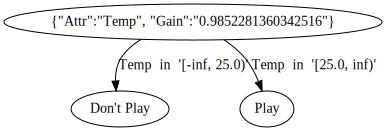

In [4]:
# Build on top of alread existing ID3 algorithm, inheriting from ID3 class

class ID3Continuous(ID3):
    def __init__(self, train_data: pd.DataFrame, labels: typing.List[str]):
        super(ID3Continuous, self).__init__(train_data, labels, populate_inner_properties=False)
        # Call attributes according the overriden values
        data_types_dict = dict(train_data.dtypes)
        self.data_types_dict = {attr: str(data_types_dict[attr]) for attr in data_types_dict}
        self.continuous_attr = None
        self.populate()
    
    def populate(self):
        self.continuous_attr = set([attr for attr in self.data_types_dict if self.data_types_dict[attr] in ['float64', 'int64']])
        self.attribute_values = {attr: set(self.train_data[attr].unique()) for attr in self.attributes if not attr in self.continuous_attr}
    
    def get_distinct_values(self, attr: str, df: pd.DataFrame, labels: typing.List[str]):
        # If it is not continuous attr simply return go to base class implementation
        if not attr in self.continuous_attr:
            return super(ID3Continuous, self).get_distinct_values(attr, df, labels)
        else:
            sorted_df = df.sort_values(attr)
            sorted_labels = [labels[idx] for idx in sorted_df["_index_"]]
            idx = 1
            changed_values = [-math.inf]
            #ID3._printExamples("Before computing change", sorted_df)
            while idx < len(sorted_labels):
                if sorted_labels[idx] != sorted_labels[idx - 1]:
                    v1 = sorted_df.iloc[idx][attr]
                    v2 = sorted_df.iloc[idx - 1][attr]
                    changed_values.append((v1 + v2)/2)
                idx += 1
            if len(changed_values) == 0 and len(sorted_df) == 1:
                changed_values.append(sorted_df.iloc[0][attr])
            changed_values = list(set(changed_values))
            changed_values.sort()
            vals = set()
            idxValues = 1
            vals.add((-math.inf, "=<", "<", changed_values[idxValues]))
            while idxValues < len(changed_values):
                vals.add((changed_values[idxValues - 1], "=<", "<", changed_values[idxValues]))
                idxValues += 1
            changed_values.append(math.inf)
            vals.add((changed_values[idxValues - 1], "=<", "<", changed_values[idxValues]))
            #print("changed vals", vals)
            return vals
    
    def eval_attr_condition(self, attr, df, val):
        if attr in self.continuous_attr:
            value1, condition1, condition2, value2 = val
            if condition1 == "=<" and condition2 == "<":
                return df[(value1 <= df[attr]) & (df[attr] < value2)]
            else:
                return df[df[attr] == val]
        else:
            return super(ID3Continuous, self).eval_attr_condition(attr, df, val)
    
    def evaluate_test(self, row_value, condition, val):
        if condition.strip().startswith("in"):
            val1, val2 = [float(i) for i in val.strip("[)").split(", ")]
            return val1 <= row_value < val2
        else:
            return super(ID3Continuous, self).evaluate_test(row_value, condition, val)
        
    def get_test_condition(self, attr, value):
        if attr in self.continuous_attr:
            value1, condition1, condition2, value2 = value
            return " in "
        else:
            return super(ID3Continuous, self).get_test_condition(attr, value)
    
    def get_test_value(self, attr, value):
        if attr in self.continuous_attr:
            value1, condition1, condition2, value2 = value
            return "[{}, {})".format(str(value1), str(value2)) #[value1, value2]
        else:
            return super(ID3Continuous, self).get_test_value(attr, value)

df_continuous = pd.DataFrame({"Sky":  ["Blue","Blue","Dark","Blue","Gloomy","Gloomy", "Dark"],
                              "Temp": [26, 24, 26, 24, 26, 24, 24]})
labels =                              ["Play", "Don't Play", "Play", "Don't Play", "Play", "Don't Play", "Don't Play"]
df_continuous_test = pd.DataFrame({"Sky":["Blue", "Gloomy", "Dark"],
                                   "Temp": [26, 7, 2]})
id3_continuous = ID3Continuous(df_continuous, labels)
id3_continuous.train()
id3_continuous.test(df_continuous_test)
id3_continuous._model.visualize()  

## 1.7 Decision Tree Regression

We can extend the idea of ID3 from a discrete target function to a continuous target function (regression).

***What should we use to make the current ID3 algorithm usable for continuous data ?*** (Click on **+** to see the answer)


We need to change the Entropy which is meant for discrete values only. The Information Gain measure will essentially change for dealing with regression data. 
One possible way is to use standard deviation or variance to tell which attribute to split on. The one which maximizes the gain in weighted average of variance most is taken.
At any given node $S$ we compute the variance as 
$$WVar(S, A) = \sum_{v \in A} (\frac{|S_v|}{|S|}(\sum_{<x_c, t_c> \in S_v} (t_c - \frac{\sum_{<x_c, t_c> \in S_v}x_c}{|S_v|})^2))$$
If we write $Var(S_v) = \frac{1}{|S_v|} (\sum_{<x_c, t_c> \in S_v} (t_c - \frac{\sum_{<x_c, t_c> \in S_v}x_c}{|S_v|})^2)$
So $WVar(S, A)$ becomes
$$WVar(S, A) = \sum_{v \in A} \frac{|S_v|^2}{|S|}Var(S_v)$$

Output: [ TestData = {'Sky': 'Blue', 'Temp': 26} NodeLabel = 1.2 ]

Output: [ TestData = {'Sky': 'Gloomy', 'Temp': 7} NodeLabel = -1.23 ]

Output: [ TestData = {'Sky': 'Dark', 'Temp': 2} NodeLabel = -1.23 ]



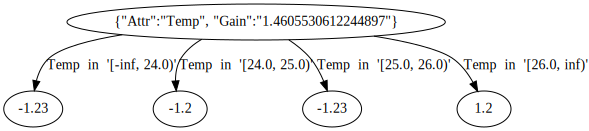

In [5]:
#Build on top of ID3Continuous
import numpy
class ID3Regression(ID3Continuous):
    def __init__(self, train_data: pd.DataFrame, labels: typing.List[float]):
        super(ID3Regression, self).__init__(train_data, labels)
    
    def get_distinct_labels(self, labels):
        var = self.get_variance(labels)
        if var > 10**-3:
            return set(labels)
        else:
            return set([self.get_average(labels)])
        
    def get_variance(self, labels: typing.List[float]):
        return numpy.var(labels, dtype='float64')
    
    def get_average(self, labels: typing.List[float]):
        return numpy.average(labels)
    
    def get_best_attribute(self, df: pd.DataFrame, attributes: typing.List[str], labels: typing.List[float]):
        max_variance_avg = -math.inf
        split_attr = None
        n = len(df)
        total_variance = self.get_variance(labels)
        for attr in attributes:
            distinct_values = self.get_distinct_values(attr, df, labels)
            curr_variance_avg = 0
            for val in distinct_values:
                new_df = self.eval_attr_condition(attr, df, val)
                if len(new_df) == 0:
                    continue
                new_labels = [labels[int(str(idx))] for idx in new_df["_index_"]]
                curr_variance_avg += (len(new_labels)**2 * self.get_variance(new_labels))/n
            curr_variance_avg = total_variance - curr_variance_avg
            if curr_variance_avg > max_variance_avg:
                split_attr = attr
                max_variance_avg = curr_variance_avg
        return [split_attr, max_variance_avg]

df_reg = pd.DataFrame({"Sky":  ["Blue","Blue","Dark","Blue","Gloomy","Gloomy", "Dark"],
                              "Temp": [26, 24, 26, 24, 26, 24, 24]})
labels =                              [1.2, -1.2, 1.23, -1.23, 1.23, -1.23, -1.23]
df_reg_test = pd.DataFrame({"Sky":["Blue", "Gloomy", "Dark"],
                                   "Temp": [26, 7, 2]})
id3_reg = ID3Regression(df_reg, labels)
id3_reg.train()
id3_reg.test(df_continuous_test)
id3_reg._model.visualize()

Reading file InputOutputExamples\InputOutputExamples\TestCase1\TrainingExamples1.csv


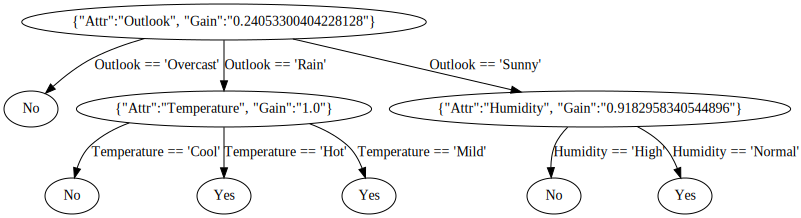

In [22]:
import pandas as pd
f_name = 'InputOutputExamples\\InputOutputExamples\\TestCase{0}\\TrainingExamples1.csv'.format("1")
print("Reading file {}".format(f_name))
df = pd.read_csv(f_name, delim_whitespace=True)
labels = df['PlayTennis'].tolist()
df.drop('PlayTennis', axis=1, inplace=True)
id3 = ID3(df, labels)
id3.train()
tree = id3._model.visualize()
tree
